In [3]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

In [4]:
# Generate a list of numbers that is suitably large and sort it
def generate_list(size):
    a = []
    for i in range(size):
        a.append(random.randint(0, size*10))
        a.sort()
    return a

In [5]:
print(generate_list(10))

[6, 26, 29, 35, 38, 46, 60, 75, 78, 92]


## Linear Search
Imagine a list: [1, 2, 3, 4, 5, 6] and you're looking for 3.

First, you look at 1 which is not the value. then you look at 2. Incorrect. Then you look at 3. Found it!

In Linear search you check items one after another in a line. You might find what you want right away, or you might have to check everything in the list. its the simplest way to search, but not always the fastest, especially with large lists. 

The runtime will be the most efficient when the number that your looking for is first in the list. The worst case runtime will be when the number is at the end of the list.

In [6]:
def linear_search(a, target):
    for i in range(len(a)):
        if a[i] == target:
            return i
    return "none"

In [7]:
g = generate_list(10)
print(g)
print(linear_search(g, g[5]))

[10, 13, 13, 42, 50, 52, 58, 63, 86, 88]
5


1. Generate a large list search 3 times for the first element record the median time 

2. Search 3 times for the middle element record the median time

3. Search 3 times for the last element and record the median time


Done this for different list sizes and ploted the time vs the size of the list

In [8]:
array_size = [1000, 2000, 4000, 8000, 16000, 32000, 48000, 64000, 80000, 96000]
medians = []

for size in array_size:
    l = generate_list(size)  
    median_list = []  

    for target in range(3):
        if target == 0:
            target_index = 0  
        elif target == 1:
            target_index = size // 2  
        else:
            target_index = size - 1  

        times = []  
        for i in range(3): 
            start = time.perf_counter()
            linear_search(l, l[target_index])  
            end = time.perf_counter()
            times.append(end - start)

        times.sort()  
        median_time = np.median(times)  
        median_list.append(median_time)  

    medians.append(median_list) 
    print("done ", size)

#print(medians)


done  1000
done  2000
done  4000
done  8000
done  16000
done  32000
done  48000
done  64000
done  80000
done  96000


This code groups the timing data from  linear search properly. I first create a new list called medians2 with three empty lists to store the reorganized times. The code takes each element and place it in the new lists - all first position timings go into the first list, middle position timings into the second list, and last position timings into the third list. This reorganization makes it easier to compare how search time varies based on the position of the target element across different list sizes.

In [ ]:
medians2 = []
for i in range(3):
    medians2.append([])

for mlist in medians:
    for index, elem in enumerate(mlist):
        medians2[index].append(elem)

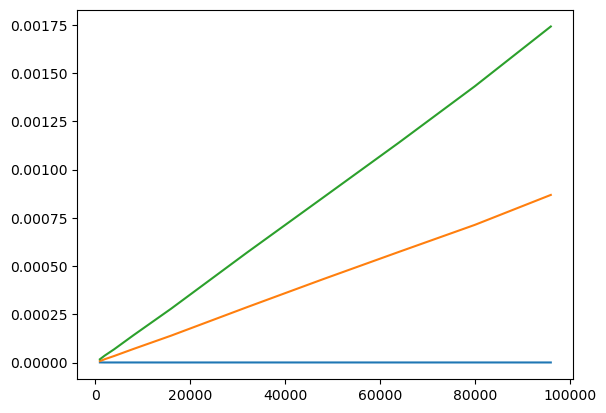

In [10]:
for l in medians2:
    plt.plot(array_size, l)

When the element is first in the list, it takes the least amount of time and is the best case scenario. This is the blue line in the graph above.

The worst case is when the element is last. This takes the most amount of time. This is the green curve in the graph above.

The average case will be when the elment is in the middle. This is the orange curve in the graph above.

## Binary Search

In Binary Search, you check the middle item of your current section. If the target is lesser or greater, then you eliminate half the remaining items. This is much faster than checking one by one, especially with large lists. Binary Search only works with sorted lists.

Imagine a list: [1, 2, 3, 4, 5] and you are looking for 3. 
First, you look at the middle element (3). Found it!

If the list has even number of values [1, 2, 3, 4, 5, 6] and you are looking for 5:
You look at 3 or 4 which is too small, so you only need to check the right half [4, 5, 6]. Now you look at the middle of that (5). Found it!

The runtime is always efficient because you eliminate half the possibilities every itteration. 
For the worst case when the number isn't in the list the runtime is $\lg{n}$. 



In [21]:
def binary_search(a, target):
    start = 0
    end = len(a) - 1
    
    while start <= end:
        mid = (start + end) // 2
        
        if a[mid] == target:
            return mid
        elif a[mid] < target:
            start = mid + 1
        else:
            end = mid - 1
    return None

In [16]:
g = generate_list(10)
print(g)
print(binary_search(g, g[5]))

[5, 12, 20, 33, 49, 56, 63, 66, 91, 93]
5


In [29]:
array_size = [1000, 2000, 4000, 8000, 16000, 32000, 40000, 48000, 50000, 64000, 70000, 80000, 90000, 96000]
medians = []

for size in array_size:
    l = generate_list(size)  
    median_list = []  

    for target in range(3):
        if target == 0:
            target_index = 0  
        elif target == 1:
            target_index = size // 2  
        else:
            target_index = size - 1  

        times = []  
        for i in range(3): 
            start = time.perf_counter()
            binary_search(l, l[target_index])  
            end = time.perf_counter()
            times.append(end - start)

        times.sort()  
        median_time = np.median(times)  
        median_list.append(median_time)  

    medians.append(median_list) 
    print("done ", size)

#print(medians)


done  1000
done  2000
done  4000
done  8000
done  16000
done  32000
done  40000
done  48000
done  50000
done  64000
done  70000
done  80000
done  90000
done  96000


In [ ]:
medians2 = []
for i in range(3):
    medians2.append([])

for mlist in medians:
    for index, elem in enumerate(mlist):
        medians2[index].append(elem)

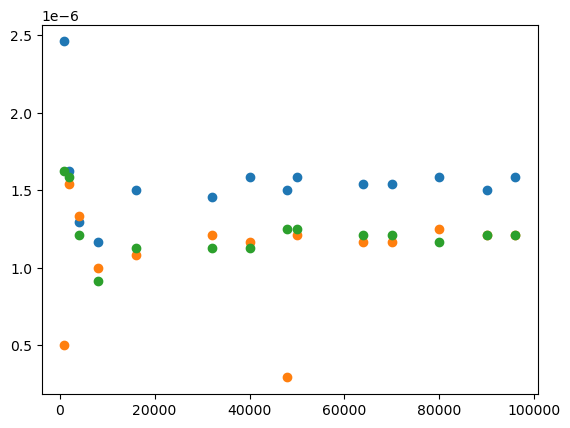

In [32]:
for l in medians2:
    plt.scatter(array_size, l)

In [28]:
print(medians2[1][:2])

[1.5832483768463135e-06, 1.3746321201324463e-06]


-  push to github
- rename / move file to search.ipynb
- document binary search 
- rewrite loop as function, call with linear/binary search as argument
- plot all running times together
- use label & legend so we can understand the plots